In [54]:
from ast import increment_lineno
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

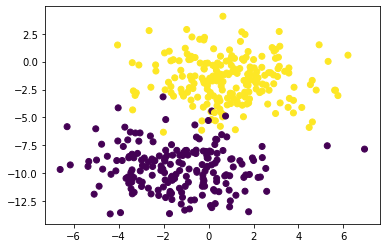

In [166]:
X, y = datasets.make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=2, random_state=2)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)


plt.scatter(x_train[:,0], x_train[:,1], marker='o', c=y_train)
plt.show()

In [181]:
from numpy import may_share_memory


def stepfunc(x):
    return np.where(x>=0, 1, 0)


N = 500 #number of itrate
w = np.zeros((len(X[1]),1))
w_f = np.empty((len(X[1]),1))
Ein = np.zeros(N)
w0 = 0
w0_f = 0

for k in range(N):
    for i in range(len(x_train)):
        y_p = stepfunc(np.dot(x_train[i], w)+w0)
        w = w + ((y_train[i] - y_p)*x_train[i:i+1]).T
        w0 = w0 + (y_train[i] - y_p)
    
    y_p = stepfunc(np.dot(x_train, w)+w0)
    Ein[k] = sum(abs(y_p[:,0]-y_train))/len(y_train)

    if(k == 0):
        Ein_min = Ein[0]
        continue
    
    if(Ein[k] < Ein_min):
            w_f = w
            w0_f = w0
            Ein_min = Ein[k]



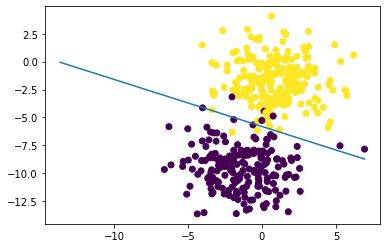

In [182]:
x0_1 = np.amax(x_train[:, 0])
x0_2 = np.amin(x_train[:, 1])
x1_1 = -(w_f[0]*x0_1 + w0_f)/w_f[1]
x1_2 = -(w_f[0]*x0_2 + w0_f)/w_f[1]

plt.plot([x0_1, x0_2], [x1_1, x1_2])
plt.scatter(x_train[:, 0], x_train[:, 1], marker='o', c=y_train)

In [183]:
y_p = stepfunc(np.dot(x_train, w_f)+w0_f)
Ein_final = sum(abs(y_p[:,0]-y_train))/len(y_train)
print(Ein_final)
min(Ein)
print(w_f)


0.02
[[ 8.04901   ]
 [19.10380678]]


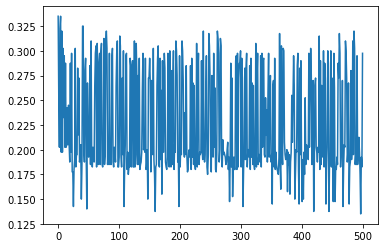

In [158]:

plt.plot(range(N),Ein)